In [2]:
import dask.dataframe as dd 
from PIL import Image
import pandas as pd
import numpy as np 
from glob import glob
from fastparquet import ParquetFile

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

In [11]:
paths = glob(r'E:\\data-covid\\dados-covid-ceara.gzip\\part.1.parquet')
pf = ParquetFile(paths)
dataframe = pf.to_pandas()

OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_bitpacked'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_bitpacked'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_unsigned_var_int'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_bitpacked'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_bitpacked'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


OverflowError: value too large

Exception ignored in: 'fastparquet.cencoding.read_bitpacked'
Traceback (most recent call last):
  File "C:\Users\valclemir\anaconda3\lib\site-packages\fastparquet\core.py", line 152, in read_data_page
    encoding.read_rle_bit_packed_hybrid(
OverflowError: value too large


IndexError: index 8060349 is out of bounds for axis 0 with size 129960

In [2]:
df = pd.read_parquet("E:\data-covid\dados-covid-ceara.gzip", engine='pyarrow')

ArrowMemoryError: malloc of size 268435456 failed

In [ ]:
df.shape

In [5]:
df.head(1)

,Unnamed: 0,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,0,8275cd0b-b3f0-4ec3-bf65-92e1c4038ccc-i0b0,b65f5c388de9c1b4cfce9c85985f5094e001e18bbbff9a...,73,1948-02-21,F,03,PARDA,230440,10,...,2,Faixa Etária,210060,SINOVAC/BUTANTAN,BUTANTAN - FUNDACAO BUTANTAN/61189445000156,2021-03-25,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Fastmedic - FastSaude


In [6]:
df.vacina_descricao_dose.unique()

array(['1ª Dose', '2ª Dose', 'Reforço', 'Dose Adicional', 'Única',
       '4ª Dose', '3ª Dose', '1º Reforço', '5ª Dose', '2º Reforço'],
      dtype=object)

In [27]:
vac_ignore = ['1ª Dose', '2ª Dose', 'Única']
drop_columns = ["Unnamed: 0", "document_id"]
new_df = df[~df.vacina_descricao_dose.isin(vac_ignore)][[i for i in df.columns if i not in drop_columns]]

In [33]:
new_df.shape

(1254933, 31)

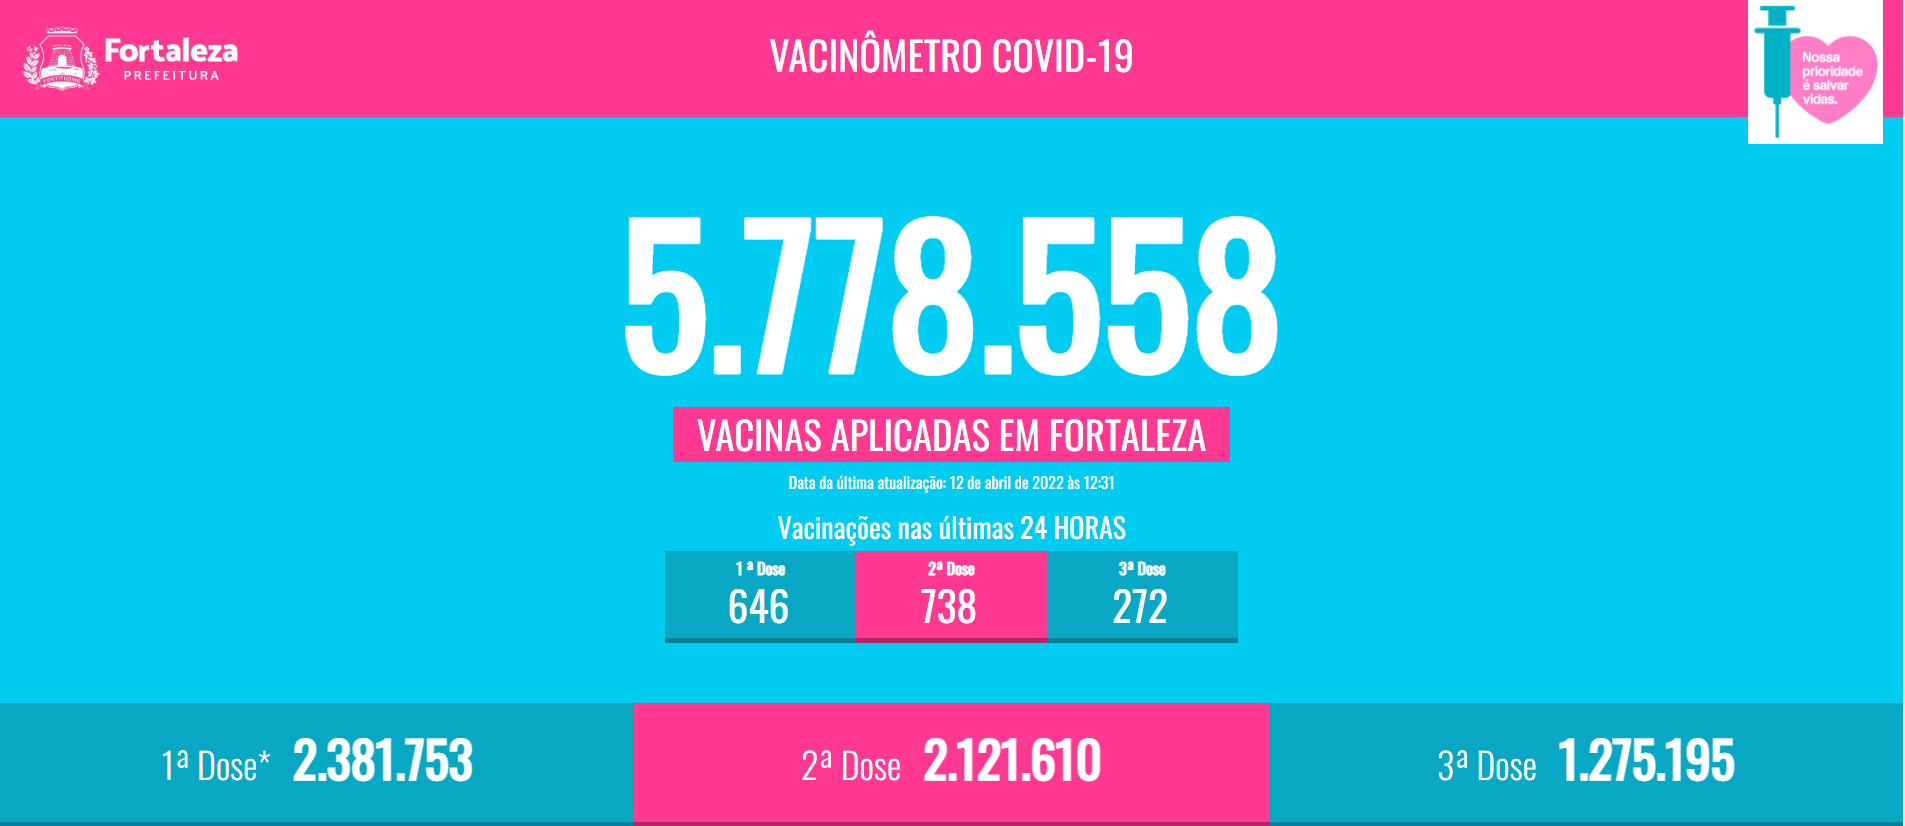

In [34]:
Image.open("vacinometro.png")

In [35]:
new_df.head(1)

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
13,4e9a9d2fca319987499cf393b9c5c107f0282667b8154e...,25,1996-05-24,M,03,PARDA,230425,10,CRUZ,BRASIL,...,114,Outros,203G21A,JANSSEN,Organization/51780468000187,2022-03-08,Reforço,88,COVID-19 JANSSEN - Ad26.COV2.S,IntegraSUS


In [37]:
new_df.vacina_dataAplicacao = pd.to_datetime(new_df.vacina_dataAplicacao)

In [85]:
new_df_groupby = new_df[["paciente_id", "vacina_dataAplicacao"]].groupby("vacina_dataAplicacao").size().reset_index().rename(columns={0: "qt_vacinacao"})

In [86]:
new_df_groupby

,vacina_dataAplicacao,qt_vacinacao
0,2020-01-14,1
1,2021-01-20,1
2,2021-03-21,1
3,2021-04-28,1
4,2021-05-03,1
...,...,...
231,2022-04-04,1907
232,2022-04-05,1621
233,2022-04-06,238
234,2022-04-07,8


In [87]:
import plotly.express as px

In [88]:
fig = px.line(new_df_groupby[["qt_vacinacao", "vacina_dataAplicacao"]], 
              x="vacina_dataAplicacao", 
              y="qt_vacinacao", 
              title='Número de vacinações 3ª dose do inicio até dia 06/04/2022')
fig.show()

In [89]:
def convert_dias_semana(dia_semana):
    case = {
       'Monday': 'Segunda-Feira', 
       'Sunday': 'Domingo', 
       'Saturday': 'Sabado', 
       'Friday': 'Sexta-Feira', 
       'Wednesday': 'Quarta-Feira', 
       'Tuesday': 'Terça-Feira',
       'Thursday': 'Quinta-Feira'
    }
    
    return case.get(dia_semana)


def convert_dias_to_int(dia_semana):
    case = {
        'Domingo': 1, 
        'Segunda-Feira':2 , 
        'Terça-Feira': 3,
        'Quarta-Feira': 4, 
        'Quinta-Feira': 5,
        'Sexta-Feira': 6, 
        'Sabado': 7
    }
    
    return case.get(dia_semana)



new_df_groupby["dia_da_semana"] = new_df_groupby.vacina_dataAplicacao.dt.day_name().apply(lambda x: convert_dias_semana(x))
new_df_groupby["index_dia_da_semana"] = new_df_groupby.vacina_dataAplicacao.dt.day_name().apply(lambda x: convert_dias_to_int(convert_dias_semana(x)))
new_df_groupby["dia_do_mes"] = new_df_groupby.vacina_dataAplicacao.dt.day
new_df_groupby["ano_mes"] = new_df_groupby.vacina_dataAplicacao.dt.strftime("%Y-%m")
new_df_groupby["ano"] = new_df_groupby.vacina_dataAplicacao.dt.year

In [90]:
new_df_groupby

,vacina_dataAplicacao,qt_vacinacao,dia_da_semana,index_dia_da_semana,dia_do_mes,ano_mes,ano
0,2020-01-14,1,Terça-Feira,3,14,2020-01,2020
1,2021-01-20,1,Quarta-Feira,4,20,2021-01,2021
2,2021-03-21,1,Domingo,1,21,2021-03,2021
3,2021-04-28,1,Quarta-Feira,4,28,2021-04,2021
4,2021-05-03,1,Segunda-Feira,2,3,2021-05,2021
...,...,...,...,...,...,...,...
231,2022-04-04,1907,Segunda-Feira,2,4,2022-04,2022
232,2022-04-05,1621,Terça-Feira,3,5,2022-04,2022
233,2022-04-06,238,Quarta-Feira,4,6,2022-04,2022
234,2022-04-07,8,Quinta-Feira,5,7,2022-04,2022


In [91]:
new_df_groupby_dia_da_semana = new_df_groupby[["qt_vacinacao", "dia_da_semana", "index_dia_da_semana"]].groupby(["dia_da_semana", "index_dia_da_semana"]).sum().reset_index().sort_values("index_dia_da_semana")


fig = px.line(new_df_groupby_dia_da_semana, 
              x="dia_da_semana", 
              y="qt_vacinacao", 
              title='Número de vacinações ao longo da semana')
fig.show()

In [92]:
new_df_groupby_dia_do_mes = new_df_groupby[["qt_vacinacao", "dia_do_mes"]].groupby("dia_do_mes").sum().reset_index().sort_values("dia_do_mes")


fig = px.line(new_df_groupby_dia_do_mes, 
              x="dia_do_mes", 
              y="qt_vacinacao", 
              title='Número de vacinações ao longo do mês')
fig.show()

In [94]:
new_df_groupby_mes= new_df_groupby[["qt_vacinacao", "ano_mes"]].groupby("ano_mes").sum().reset_index().sort_values("ano_mes")


fig = px.line(new_df_groupby_mes, 
              x="ano_mes", 
              y="qt_vacinacao", 
              title='Número de vacinações ao longo do mês')
fig.show()

#### Comparando este gráfico com o primeiro gráfico onde lá a gente plota a quantidade de vacinação dia a dia e aqui mês a mês, podemos notar que esse gráfico tá mais suave, pois retiramos a variação diária.

In [102]:
columns_select = ["ano_mes","qt_vacinacao"]
filter_date = ((new_df_groupby.ano_mes >= "2021-08") & (new_df_groupby.ano_mes <= new_df_groupby.ano_mes.max()))
new_df_train = new_df_groupby[filter_date][columns_select].groupby("ano_mes").sum().reset_index().rename(columns={0: "ano_mes"}).set_index("ano_mes")

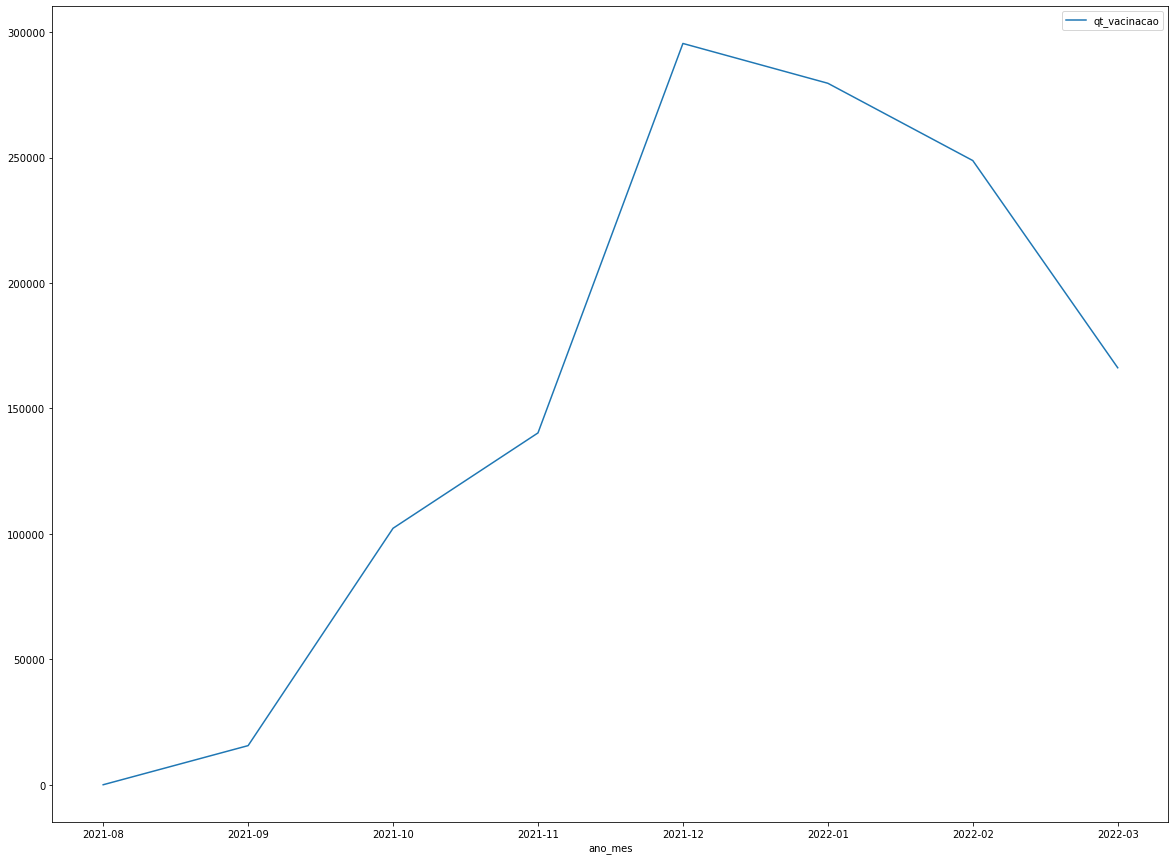

In [113]:
new_df_train.iloc[:-1].plot();

In [236]:
from statsmodels.tsa.stattools import adfuller

In [238]:
def adfuller_test(g_celsius):
    result=adfuller(g_celsius)
    labels = ['ADF Teste Estatistico','p-value','Num Lags','Num Observações']
    for value,label in zip(result,labels):
        print(label+' : '+str(round(value, 2) ))

    if result[1] <= 0.05:
        print("forte evidência contra a hipótese nula (Ho), rejeite a hipótese nula. Os dados são estacionários")
    else:
        print("evidência fraca contra a hipótese nula, indicando que é não estacionária")


        

adfuller_test(new_df_train)

ADF Teste Estatistico : -1.65
p-value : 0.46
Num Lags : 2
Num Observações : 6
evidência fraca contra a hipótese nula, indicando que é não estacionária


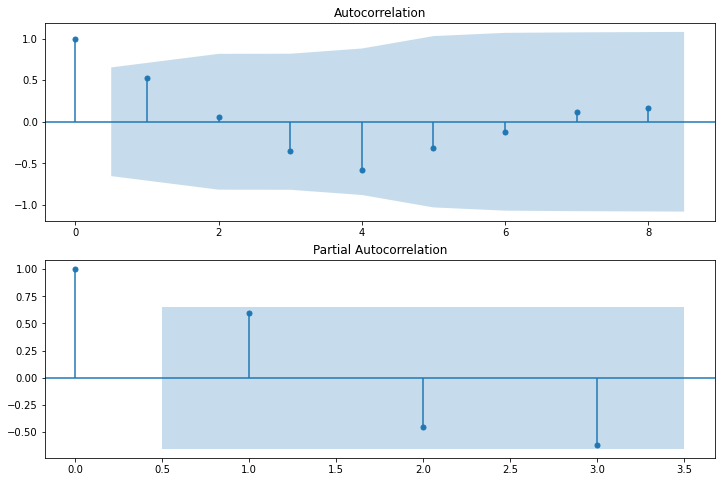

In [129]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df_train, lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df_train, lags=3, ax=ax2)

<b>Tendências</b>

    Quando as tendências estão presentes em uma série temporal, lags mais curtos geralmente têm grandes correlações positivas porque observações mais próximas no tempo tendem a ter valores semelhantes. As correlações diminuem lentamente à medida que os atrasos aumentam.

In [190]:
size = 0.05
train_size = int(new_df_train.iloc[:-1].shape[0] * (1 - size))

train = new_df_train.sort_index().iloc[0: train_size]
test  = new_df_train.sort_index().iloc[train_size:]

In [191]:
train

,qt_vacinacao
ano_mes,
2021-08,15
2021-09,15606
2021-10,102247
2021-11,140261
2021-12,295507
2022-01,279638
2022-02,248825


In [193]:
test

,qt_vacinacao
ano_mes,
2022-03,166232
2022-04,6587


In [203]:
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings('ignore')



arima = ARIMA(train, order=(1, 1, 0))


arima_results = arima.fit(disp=0)
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.qt_vacinacao   No. Observations:                    6
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -74.762
Method:                       css-mle   S.D. of innovations          62188.507
Date:                Tue, 12 Apr 2022   AIC                            155.524
Time:                        22:58:31   BIC                            154.899
Sample:                    09-01-2021   HQIC                           153.023
                         - 02-01-2022                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.482e+04   2.24e+04      2.003      0.045     968.437    8.87e+04
ar.L1.D.qt_vacinacao    -0.2008      0.431     -0.466      0.641      -1.046       0.644
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.9789           +0.0000j            4.9789            0.5000
-----------------------------------------------------------------------------
"""

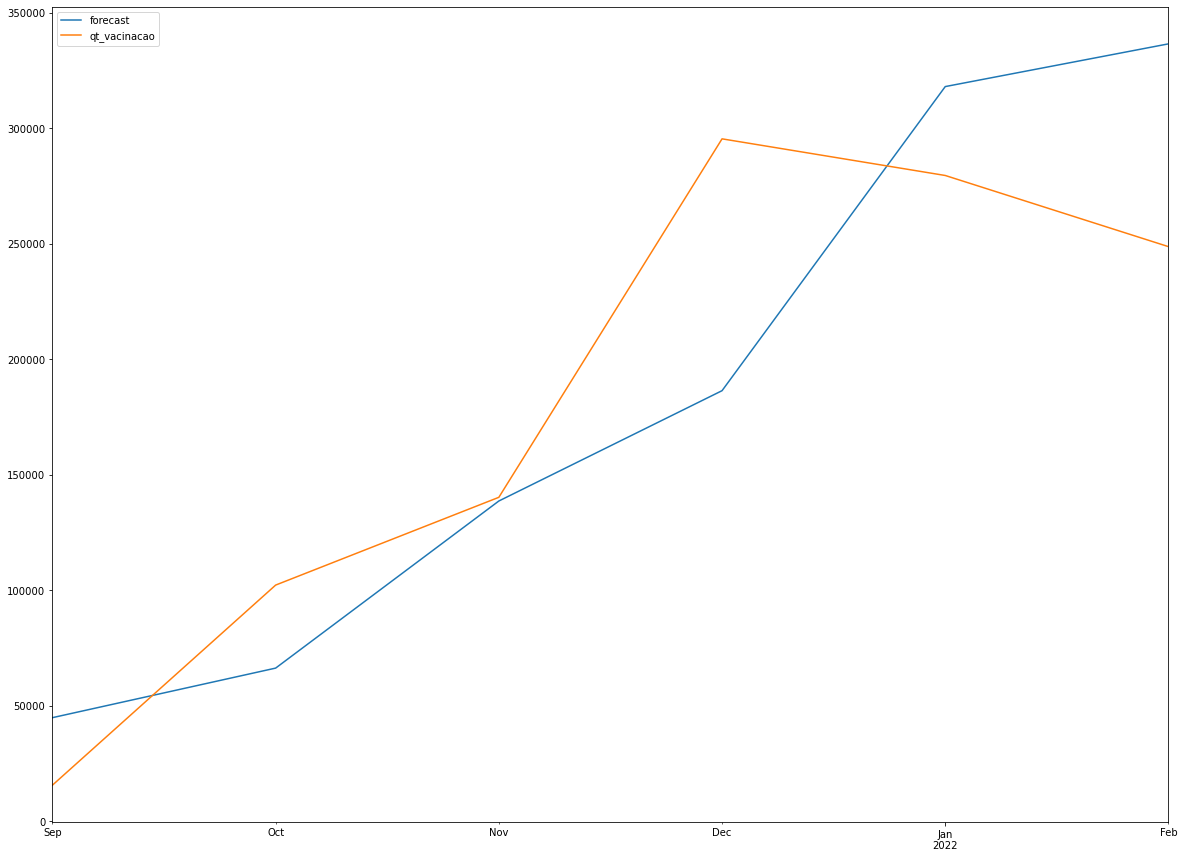

In [204]:
arima_results.plot_predict(dynamic=False);

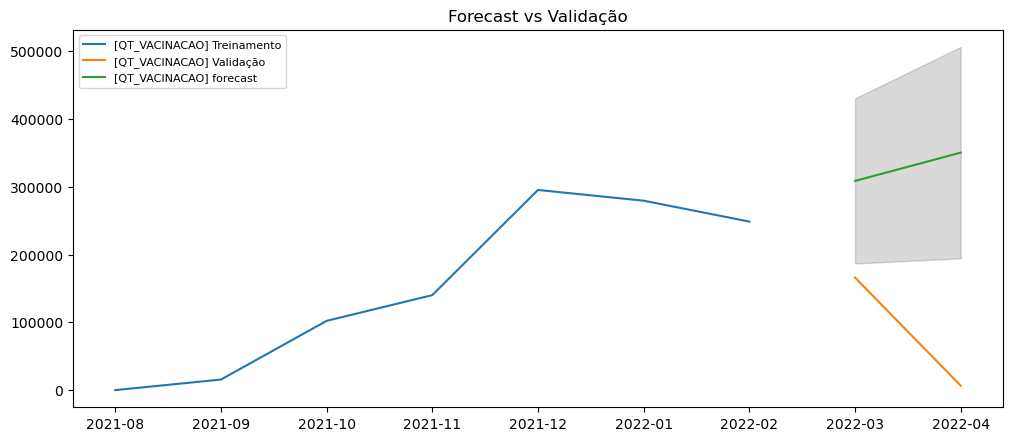

In [205]:
sample = 2
test_ = test.iloc[0:sample]
train_ = train
fc, se, conf = arima_results.forecast(sample, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test_.index)
lower_series = pd.Series(conf[:, 0], index=test_.index)
upper_series = pd.Series(conf[:, 1], index=test_.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_, label='[QT_VACINACAO] Treinamento')
plt.plot(test_, label='[QT_VACINACAO] Validação')
plt.plot(fc_series, label='[QT_VACINACAO] forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Validação')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [206]:
sample_size = 2000
fc, se, conf = arima_results.forecast(test.iloc[0:sample_size].shape[0], alpha=0.05) 

In [207]:
y_pred = fc 
y_true = test.iloc[0:sample_size].values.flatten()

In [210]:
MAE = np.mean(abs(y_true - y_pred))
RMSE = np.sqrt(((y_true - y_pred) ** 2).mean())

df_stats = pd.DataFrame()
dict_stats = {"MODELO": "ARIMA 1", "MAE": MAE, "RMSE": RMSE}
df_stats = df_stats.append([dict_stats])

print("Erro médio Abs=",MAE)
print("Erro quadratico médio=", RMSE)

Erro médio Abs= 243302.80650519786
Erro quadratico médio= 263320.5235380174


### Retirando o mês 08 e 09 da amostra

In [216]:
size = 0.05
train_size = int(new_df_train.iloc[2:].iloc[:-1].shape[0] * (1 - size))

train = new_df_train.iloc[2:].sort_index().iloc[0: train_size]
test  = new_df_train.iloc[2:].sort_index().iloc[train_size:]

In [260]:
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings('ignore')



arima = ARIMA(train, order=(0, 1, 0))


arima_results = arima.fit(disp=0)
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.qt_vacinacao   No. Observations:                    4
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -50.474
Method:                           css   S.D. of innovations          73103.306
Date:                Wed, 13 Apr 2022   AIC                            104.949
Time:                        01:19:13   BIC                            103.721
Sample:                    11-01-2021   HQIC                           102.255
                         - 02-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.664e+04   3.66e+04      1.003      0.316    -3.5e+04    1.08e+05
==============================================================================
"""

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

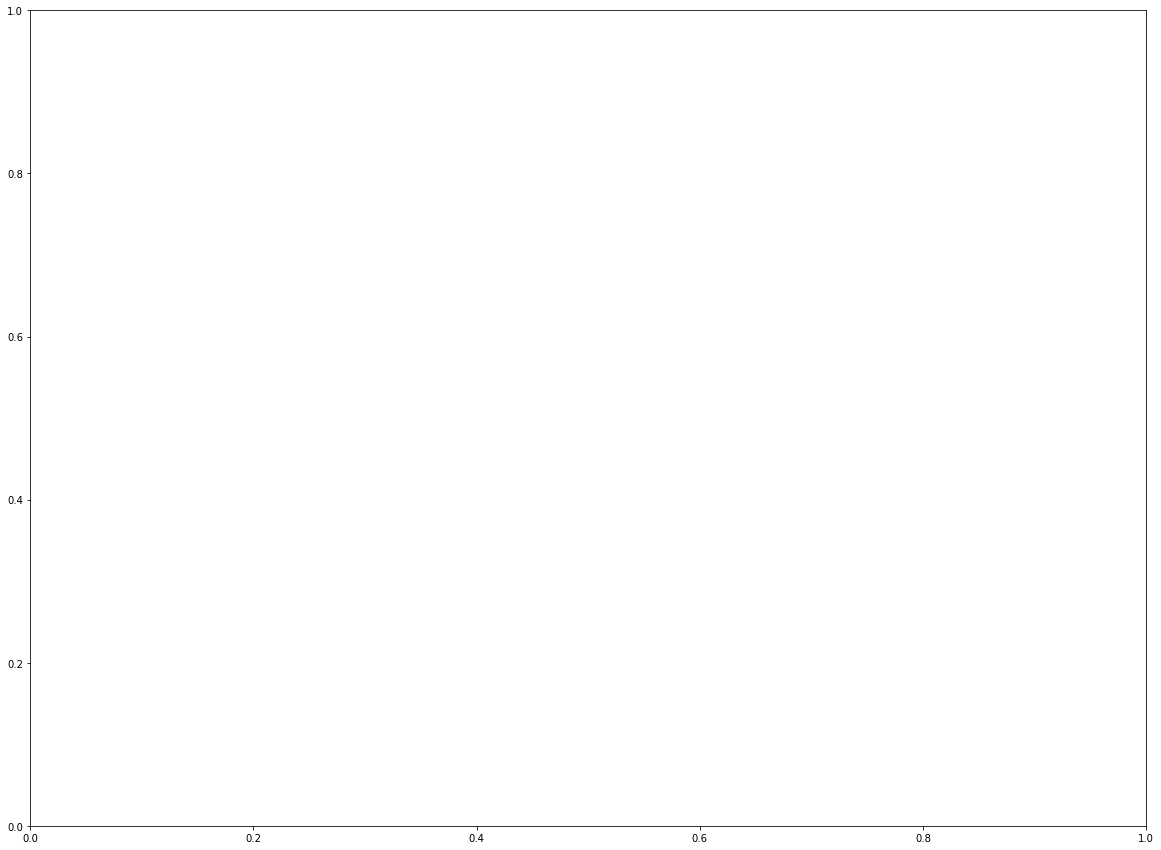

In [261]:
arima_results.plot_predict(dynamic=False);

In [262]:
sample = 2
test_ = test.iloc[0:sample]
train_ = train
fc, se, conf = arima_results.forecast(sample, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test_.index)
lower_series = pd.Series(conf[:, 0], index=test_.index)
upper_series = pd.Series(conf[:, 1], index=test_.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_, label='[QT_VACINACAO] Treinamento')
plt.plot(test_, label='[QT_VACINACAO] Validação')
plt.plot(fc_series, label='[QT_VACINACAO] forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Validação')
plt.legend(loc='upper left', fontsize=8)
plt.show()

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [233]:
sample_size = 2000
fc, se, conf = arima_results.forecast(test.iloc[0:sample_size].shape[0], alpha=0.05) 

In [234]:
y_pred = fc 
y_true = test.iloc[0:sample_size].values.flatten()

In [235]:
MAE = np.mean(abs(y_true - y_pred))
RMSE = np.sqrt(((y_true - y_pred) ** 2).mean())

df_stats = pd.DataFrame()
dict_stats = {"MODELO": "ARIMA 1", "MAE": MAE, "RMSE": RMSE}
df_stats = df_stats.append([dict_stats])

print("Erro médio Abs=",MAE)
print("Erro quadratico médio=", RMSE)

Erro médio Abs= 229506.58812333588
Erro quadratico médio= 249933.08196202002


In [258]:
import itertools
p = d = q = range(0, 2)


pdq = list(itertools.product(p, d, q))

df_stats_aic = pd.DataFrame()

for param in pdq:
    try:
                
        mod = ARIMA(train,
                    order=param)
        
        
        results = mod.fit()
        
        scores = {'ARIMA': param , "AIC":results.aic}
        
        df_stats_aic = df_stats_aic.append([scores])
        
    except Exception as e:
        print(e)
        continue

Insufficient degrees of freedom to estimate
The model specification cannot be estimated. The model contains 4 regressors (0 trend, 0 seasonal, 4 lags) but after adjustment for hold_back and creation of the lags, there are only 1 data points available to estimate parameters.
The model specification cannot be estimated. The model contains 3 regressors (0 trend, 0 seasonal, 3 lags) but after adjustment for hold_back and creation of the lags, there are only 1 data points available to estimate parameters.


In [259]:
df_stats_aic

,ARIMA,AIC
0,"(0, 0, 0)",130.779192
0,"(0, 0, 1)",131.044757
0,"(0, 1, 0)",104.948539
0,"(1, 0, 0)",131.943238
0,"(1, 1, 0)",106.891883
